# Image Compression using an Unsupervised Learning Algorithm (K-Means)

## The Data

I will be using an image of .jpg format for this task.


### My Goal
Given an image, my goal is to treat an image as dataset whose pixels' intensities are my rows of data.
After implementing K-means algorithm, I want to cluster similar pixels and assign a color to each cluster. By doing that, I reduce the size of my image drastically.

As the task is an unsupervised learning, I will not have labels for assessment. Therefore, to make sure that my clustering is performing in a correct way, I will do the clustering on a simple artificial dataset to confirm the results beforehand.

## Imports

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

sns.set_style('darkgrid')
%matplotlib inline

<a name="1"></a>
## 1 - Implementing K-means

The K-means algorithm is a method to automatically cluster similar
data points together. 

* Concretely, given a training set $\{x^{(1)}, ..., x^{(m)}\}$, I want
to group the data into a few cohesive “clusters”. 


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then 
     * Refines this guess by 
         * Repeatedly assigning examples to their closest centroids, and then 
         * Recomputing the centroids based on the assignments.
         

* In pseudocode, the K-means algorithm is as follows:

    ``` python
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster assignment step: 
        # Assign each data point to the closest centroid. 
        # idx[i] corresponds to the index of the centroid 
        # assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step: 
        # Compute means based on centroid assignments
        centroids = compute_centroids(X, idx, K)
    ```


* The inner-loop of the algorithm repeatedly carries out two steps: 
    1. Assigning each training example $x^{(i)}$ to its closest centroid, and
    2. Recomputing the mean of each centroid using the points assigned to it. 
    
    
* The $K$-means algorithm will always converge to some final set of means for the centroids. 

* However, the converged solution may not always be ideal and depends on the initial setting of the centroids.
    * Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. 
    * One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).

I will implement the two phases of the K-means algorithm separately
in the next sections. 

<a name="1.1"></a>
### 1.1 Finding closest centroids

In the “cluster assignment” phase of the K-means algorithm, the
algorithm assigns every training example $x^{(i)}$ to its closest
centroid, given the current positions of centroids. 


In function => `find_closest_centroids`. 
* This function takes the data matrix `X` and the locations of all
centroids inside `centroids` 
* It should output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index  of the closest centroid (a value in $\{0,...,K-1\}$, where $K$ is total number of centroids) to every training example . 
* Specifically, for every example $x^{(i)}$ I set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where 
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ , and 
 * $\mu_j$ is the position (value) of the $j$’th centroid.
 * $||x^{(i)} - \mu_j||$ is the L2-norm

In [2]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(len(X)):
        minimum_dist = 1000
        cluster_number = 0
        for k_th in range(K):
            compute_distance = np.sqrt(np.sum((X[i] - centroids[k_th]) ** 2))
            if compute_distance <= minimum_dist:
                minimum_dist = compute_distance
                cluster_number = k_th
        idx[i] = cluster_number    
    return idx

<a name="1.2"></a>
### 1.2 Computing centroid means

Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that
were assigned to it.


* Specifically, for every centroid $\mu_k$ I am going to set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

    where 
    * $C_k$ is the set of examples that are assigned to centroid $k$
    * $|C_k|$ is the number of examples in the set $C_k$


* Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$,
then you should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

In [3]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    m, n = X.shape
    
    centroids = np.zeros((K, n))
    
    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis = 0)    
    return centroids

<a name="1.3"></a>
### 1.3 Running KMeans on an Artificial Dataset

In [4]:
def run_kMeans(X, initial_centroids, max_iters=10):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

In [5]:
# Load an example dataset
points = make_blobs(n_samples=200, n_features=2, cluster_std=1.8, centers=4 ,random_state=101, return_centers=True)
X = points[0]

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5],[1,1]])

# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [6]:
points

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

In [7]:
centroids

array([[-4.13591321,  7.95389851],
       [-0.0123077 ,  2.13407664],
       [ 3.71749226,  7.01388735],
       [-9.46941837, -6.56081545]])

In [8]:
idx

array([0, 2, 1, 2, 2, 3, 2, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 1, 3, 0, 3, 1,
       1, 3, 0, 3, 3, 1, 2, 2, 0, 3, 2, 1, 1, 0, 3, 3, 3, 1, 3, 0, 0, 0,
       1, 2, 0, 1, 3, 1, 1, 0, 2, 1, 3, 0, 1, 1, 0, 2, 3, 2, 3, 0, 2, 1,
       3, 2, 2, 3, 2, 1, 3, 1, 3, 2, 2, 1, 0, 1, 1, 3, 2, 3, 1, 1, 1, 0,
       1, 3, 3, 3, 3, 1, 1, 3, 2, 0, 3, 2, 1, 3, 1, 1, 2, 1, 3, 2, 3, 3,
       2, 0, 0, 2, 3, 2, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 3, 0, 0, 0,
       1, 3, 3, 0, 2, 0, 2, 1, 3, 2, 3, 0, 0, 2, 1, 3, 0, 0, 0, 0, 1, 2,
       1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 3, 0, 1, 2, 0, 1, 2, 1, 0, 2, 1, 0,
       2, 2, 3, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 1, 3, 2, 2, 0, 3, 1, 2, 2,
       3, 1])

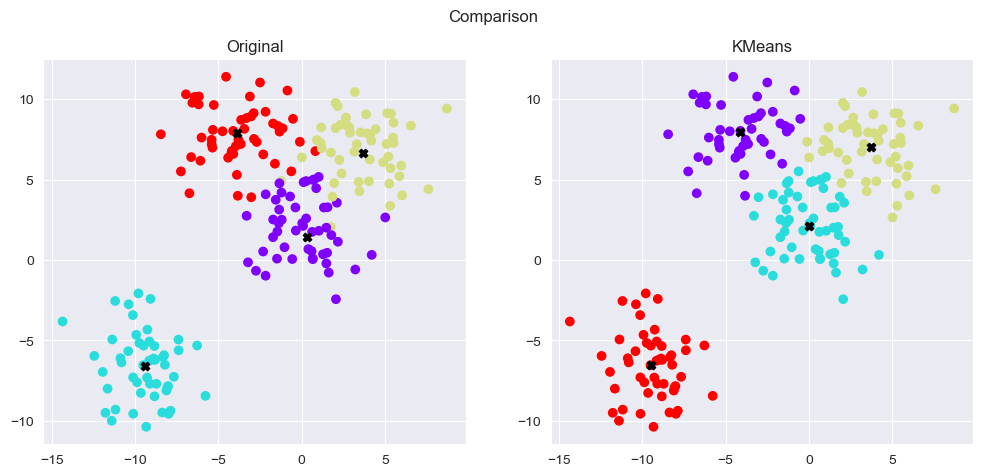

In [11]:
fig, (axes1, axes2) = plt.subplots(1, 2, sharex=True, figsize=(12,5))
fig.suptitle('Comparison')
axes1.set_title('Original')
axes2.set_title('KMeans')

axes1.scatter(x=X[:,0], y=X[:,1], c=points[1], cmap='rainbow')
axes2.scatter(x=X[:,0], y=X[:,1], c=idx, cmap='rainbow')

axes1.scatter(x=points[2][:,0], y=points[2][:,1], c='black', marker='X')
axes2.scatter(x=centroids[:,0], y=centroids[:,1], c='black', marker='X')

2 - Random initialization
The initial assignments of centroids for the example dataset was designed. 

The code first randomly shuffles the indices of the examples (using np.random.permutation()).
Then, it selects the first  𝐾
  examples based on the random permutation of the indices.
This allows the examples to be selected at random without the risk of selecting the same example twice.

In [12]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

In [25]:
def compute_cost(X, centroids, idx):
    m, n = X.shape
    K = centroids.shape[0]
    cost = 0.0

    for i in range(m):
        for k in range(K):
            cost += np.sum((X[i, :] - centroids[k, :]) ** 2) if idx[i] == k else 0

    cost /= m

    return cost

<a name="2"></a>
## 3 - Image compression with K-means

Here, I will apply K-means to image compression. 

* In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
* My image contains thousands of colors, and in this part, I will reduce the number of
colors to 16 colors.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way. 
* Specifically, I only need to store the RGB values of the 16 selected colors, and for each pixel in the image I now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this part, I will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.
* Concretely, I will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.
* Once I have computed the cluster centroids on the image, I will then use the 16 colors to replace the pixels in the original image.

<a name="2.1"></a>
### 3.1 Dataset

**Load image**

In [13]:
# Load an image of a bird
original_img = plt.imread('image_color.jpg')

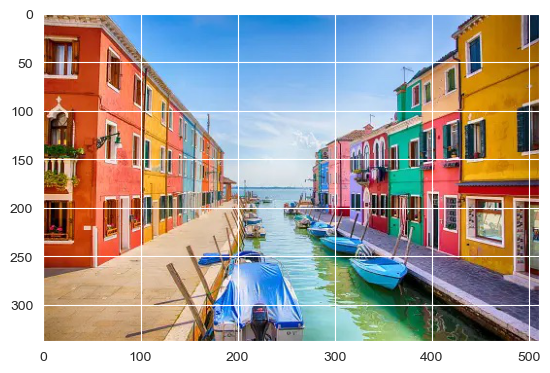

In [14]:
# Visualizing the image
plt.imshow(original_img)

In [15]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (338, 511, 3)


In [16]:
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 538 x 538 = 289444)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

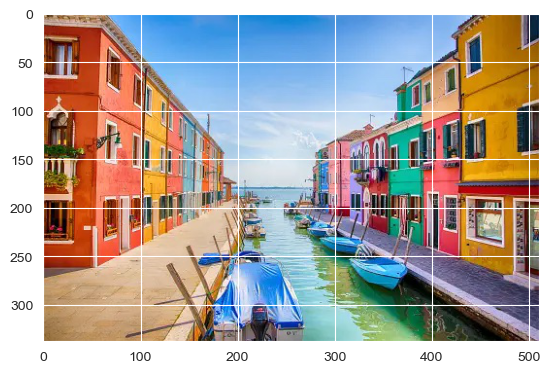

In [17]:
plt.imshow(original_img)

<a name="3.2"></a>
### 3.2 K-Means on image pixels

Now, I want to run the cell below to run K-Means on the pre-processed image.

In [26]:
# Run your K-Means algorithm on this data
K = 16
max_iters = 10

# Using the function I have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this can take a couple of minutes depending on K and max_iters
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

cost = compute_cost(X_img, centroids, idx)
print(f"Final cost: {cost}")

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

Final cost: 0.015967034939550526


In [28]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (172718,)
Closest centroid for the first five elements: [7 7 6 7 7]


<a name="3.3"></a>
### 3.3 Compress the image

After finding the top $K=16$ colors to represent the image, I can now
assign each pixel position to its closest centroid using the
`find_closest_centroids` function. 
* This allows me to represent the original image using the centroid assignments of each pixel. 
* Notice that I have significantly reduced the number of bits that are required to describe the image. 

In [29]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

Finally, I can view the effects of the compression by reconstructing
the image based only on the centroid assignments. 
* Specifically, you replaced each pixel with the value of the centroid assigned to
it. 

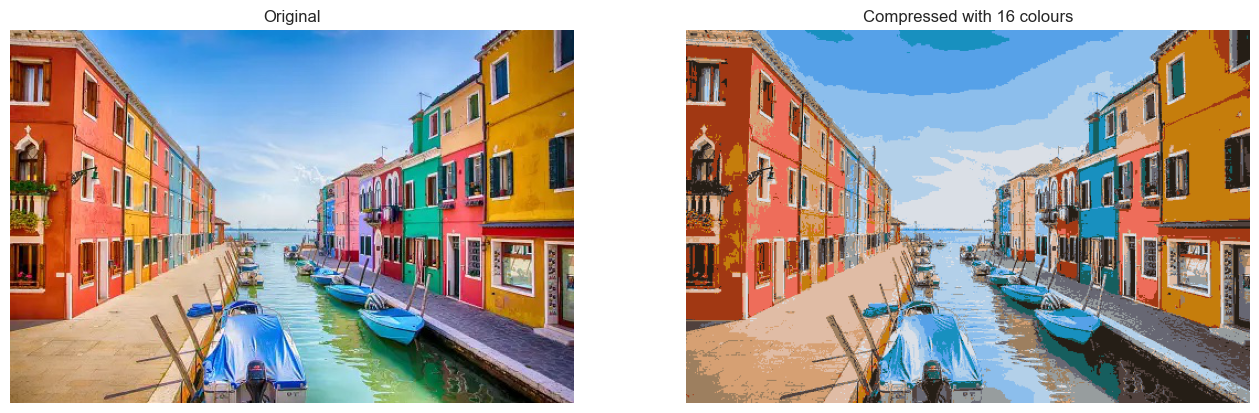

In [30]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

Clearly, choosing the right value for K is always a challenge. One way to think is to choose the K based on the optimum value of cost using elbow method as below, but as the clustering is usually performed for future analysis, I choose the K=16 as it makes more sense for the purpose of image compression.

In [38]:
list_of_k = [2, 4, 8, 16, 32, 64]
costs = []

#This will take time to run as the algorithm will run multiple times


for k in list_of_k:
    # Run your K-Means algorithm on this data
    print('\n')
    print(f'K={k}')
    max_iters = 10

    # Using the function I have implemented above. 
    initial_centroids = kMeans_init_centroids(X_img, k)

    # Run K-Means - this can take a couple of minutes depending on K and max_iters
    centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)
    
    cost = compute_cost(X_img, centroids, idx)
    costs.append(cost)
    print(f"Final cost for K={k}: {cost}")
    print(15 * '-')



K=2
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

Final cost for K=2: 0.11243205995768686
---------------


K=4
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

Final cost for K=4: 0.058956800148375885
---------------


K=8
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

Final cost for K=8: 0.0290796036468428
---------------


K=16
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

Final cost for K=16: 0.016118566912653714
---------------


K=32
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

Final cost for K=32: 0.00955084536756561
---------------


K=64
K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

Final cost for K=64: 0.005743139196531516
---------------


In [33]:
df_cost = pd.DataFrame({
    'K': list_of_k,
    'Cost': costs
})

In [34]:
df_cost

,K,Cost
0,2,0.112433
1,4,0.059323
2,8,0.032617
3,16,0.016776
4,32,0.008888
5,64,0.005370


Text(0.5, 1.0, 'Elbow Method')

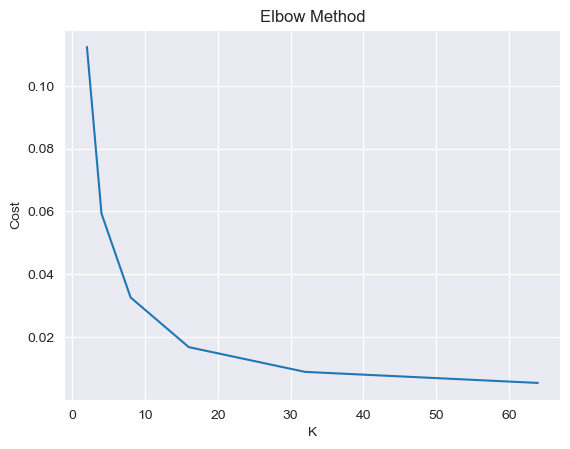

In [37]:
sns.lineplot(data=df_cost, y='Cost', x='K')
plt.xlabel('K')
plt.ylabel('Cost')
plt.title('Elbow Method')

In conclusion, the higher K, the lower the cost, but K is recommended to chosen in a way that make sense for you application.